# Neo4j问答运行测试

## 技术架构图

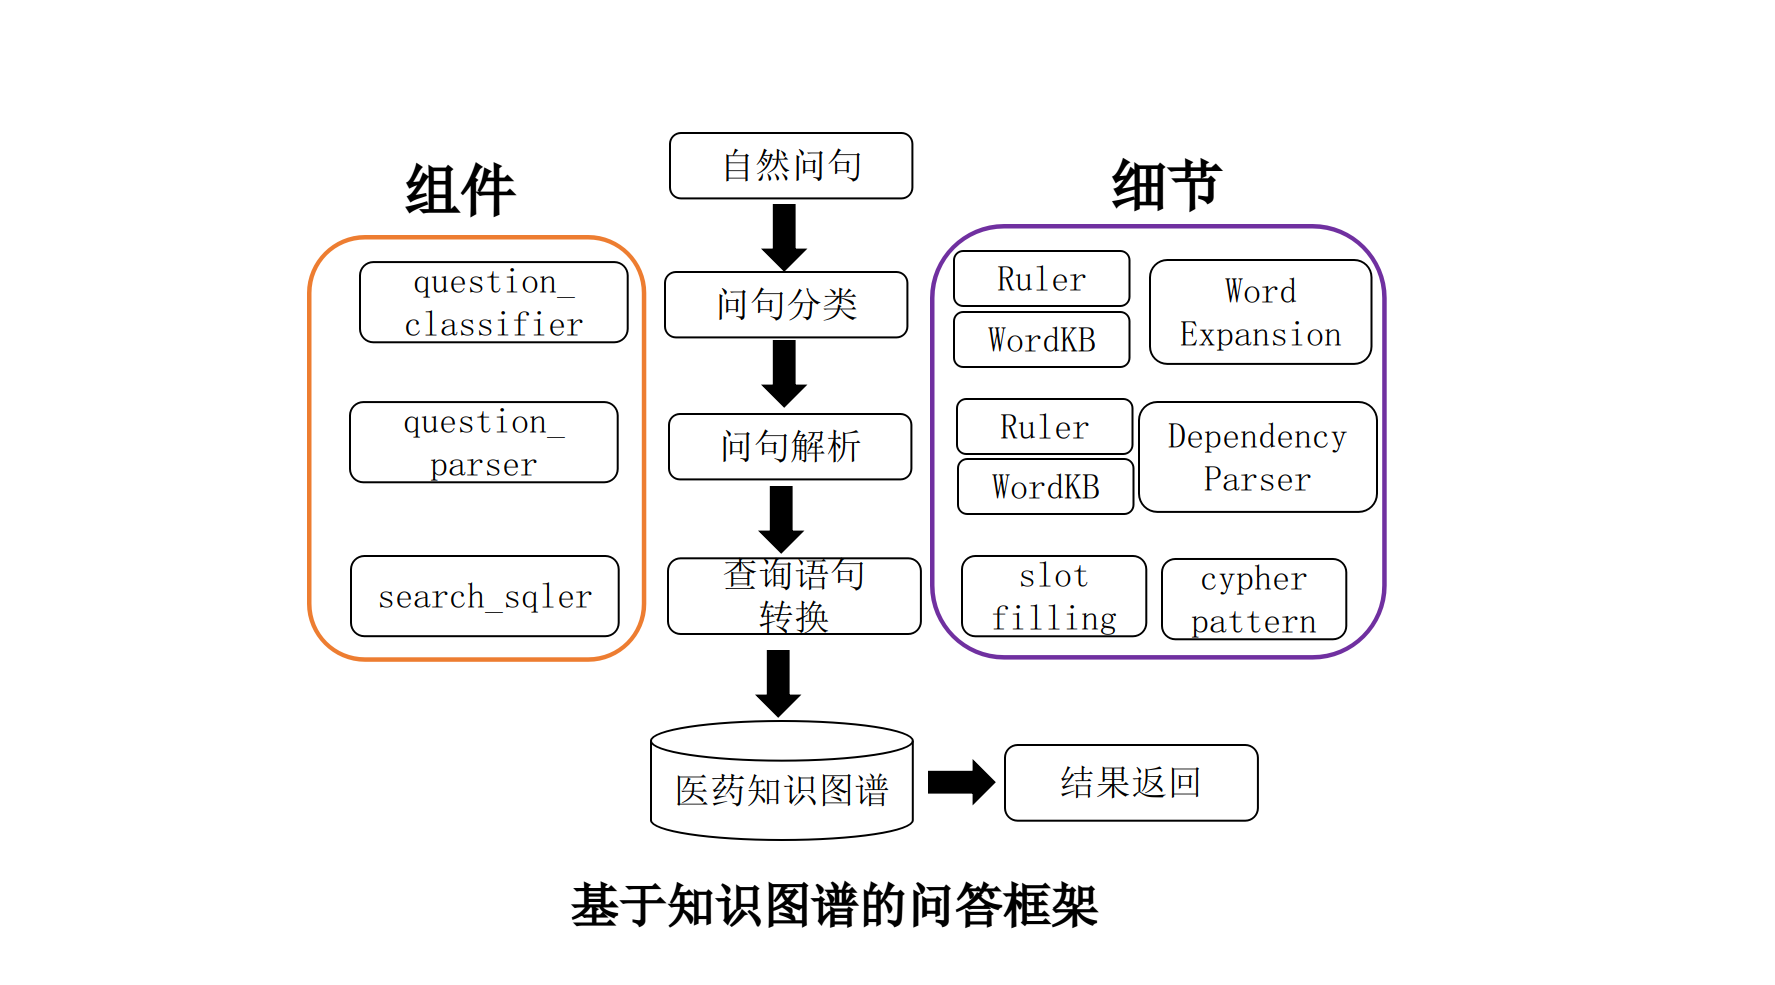

## 导入引用

In [1]:
import os
from neo4j_driver import Neo4jConnection, Node
from answer_search import AnswerSearcher
from question_parser import QuestionPaser
from question_classifier import QuestionClassifier

## 实例化对象

In [2]:
g = Neo4jConnection('neo4j://localhost:7687/', 'neo4j', 'Lorne@2022')
classifier = QuestionClassifier()
parser = QuestionPaser()
searcher = AnswerSearcher(g)

## 输入问题

In [3]:
question = '肺气肿不能吃什么'

## 从问题中提取实体和关系

In [4]:
res_classify = classifier.classify(question)

In [5]:
res_classify

{'args': {'肺气肿': ['disease']}, 'question_types': ['disease_not_food']}

## 问题解析-生成Cypher查询语句

In [6]:
res_cypher = parser.parser_main(res_classify)

In [7]:
res_cypher

[{'question_type': 'disease_not_food',
  'sql': ["MATCH (m:Disease)-[r:no_eat]->(n:Food) where m.name = '肺气肿' return m.name, r.name, n.name"]}]

## 生成回答

In [8]:
final_answers = searcher.search_main(res_cypher)

In [9]:
final_answers

['肺气肿忌食的食物包括有：海虾；圆白菜；带鱼；羊肉(瘦)']

In [10]:
!pip install zhipuai

Defaulting to user installation because normal site-packages is not writeable


In [11]:
from runner import Runner

In [12]:
llm = Runner()

In [13]:
llm.ask('肺气肿不能吃什么')

"肺气肿患者应避免食用以下食物：海虾、圆白菜、带鱼和羊肉 (瘦)。"

'"肺气肿患者应避免食用以下食物：海虾、圆白菜、带鱼和羊肉 (瘦)。"'